In [1]:
import os, glob
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
import csv
import pprint as pprint
from scipy.stats import linregress
from sklearn import datasets
from scipy import stats
from pprint import pprint
path = pd.read_csv("merged.csv")
path


/Users/alicearnold/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (3,4,5,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,67,68,71,72,73,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,101,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,125,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,151,152,155,156,159,160,167,168,171,172,175,176,177,179,180,183,184,187,188,191,192,195,196,199,200,201,203,204,207,208,211,212,213,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,237,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,279,280,281,282,283,284,285,287,288,289,290,291,29

,Unnamed: 0,id,Geographic Area Name,Estimate!!HOUSEHOLDS BY TYPE!!Total households,Margin of Error!!HOUSEHOLDS BY TYPE!!Total households,Percent!!HOUSEHOLDS BY TYPE!!Total households,Percent Margin of Error!!HOUSEHOLDS BY TYPE!!Total households,Estimate!!HOUSEHOLDS BY TYPE!!Total households!!Married-couple family,Margin of Error!!HOUSEHOLDS BY TYPE!!Total households!!Married-couple family,Percent!!HOUSEHOLDS BY TYPE!!Total households!!Married-couple family,...,Estimate!!COMPUTERS AND INTERNET USE!!Total households!!With a computer,Margin of Error!!COMPUTERS AND INTERNET USE!!Total households!!With a computer,Percent!!COMPUTERS AND INTERNET USE!!Total households!!With a computer,Percent Margin of Error!!COMPUTERS AND INTERNET USE!!Total households!!With a computer,Estimate!!COMPUTERS AND INTERNET USE!!Total households!!With a broadband Internet subscription,Margin of Error!!COMPUTERS AND INTERNET USE!!Total households!!With a broadband Internet subscription,Percent!!COMPUTERS AND INTERNET USE!!Total households!!With a broadband Internet subscription,Percent Margin of Error!!COMPUTERS AND INTERNET USE!!Total households!!With a broadband Internet subscription,County,State
0,1,0500000US01003,"Baldwin County, Alabama",82325,3231,82325,(X),42253,3566,51.3,...,77281,3480,93.9,1.7,71352,3555,86.7,2.3,Baldwin County,Alabama
1,2,0500000US01015,"Calhoun County, Alabama",44636,2010,44636,(X),20571,1976,46.1,...,38833,2317,87.0,3.1,35353,2291,79.2,3.7,Calhoun County,Alabama
2,3,0500000US01043,"Cullman County, Alabama",32090,1233,32090,(X),17070,1332,53.2,...,27889,1303,86.9,2.7,26323,1391,82.0,3.8,Cullman County,Alabama
3,4,0500000US01049,"DeKalb County, Alabama",24880,1347,24880,(X),13623,1516,54.8,...,21513,1469,86.5,3.7,20393,1453,82.0,3.8,DeKalb County,Alabama
4,5,0500000US01051,"Elmore County, Alabama",30712,1330,30712,(X),16257,1636,52.9,...,27867,1566,90.7,3.0,25995,1677,84.6,3.9,Elmore County,Alabama
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3967,3979,0500000US56037,"Sweetwater County, Wyoming",15523,453,15523,(X),8534,409,55,...,14458,470,93.1,1.6,13040,461,84,2,Sweetwater County,Wyoming
3968,3980,0500000US56039,"Teton County, Wyoming",9019,472,9019,(X),4360,436,48.3,...,8593,504,95.3,1.9,7858,510,87.1,3.4,Teton County,Wyoming
3969,3981,0500000US56041,"Uinta County, Wyoming",7597,285,7597,(X),4525,274,59.6,...,7184,303,94.6,1.8,6802,299,89.5,2.5,Uinta County,Wyoming
3970,3982,0500000US56043,"Washakie County, Wyoming",3365,149,3365,(X),1815,150,53.9,...,2939,168,87.3,3.5,2631,197,78.2,4.6,Washakie County,Wyoming


In [2]:
new_df = path[[ 'Geographic Area Name', "Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Associate's degree", 
               "Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Bachelor's degree",
              "Percent!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Associate's degree", 
               "Percent!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Bachelor's degree",
              'Estimate!!HOUSEHOLDS BY TYPE!!Total households!!Average family size']]
new_df

,Geographic Area Name,Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Associate's degree,Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Bachelor's degree,Percent!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Associate's degree,Percent!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Bachelor's degree,Estimate!!HOUSEHOLDS BY TYPE!!Total households!!Average family size
0,"Baldwin County, Alabama",16170,32781,10.1,20.5,3.36
1,"Calhoun County, Alabama",7112,9082,9.0,11.5,3.06
2,"Cullman County, Alabama",6783,5935,11.5,10.1,3.00
3,"DeKalb County, Alabama",4433,3693,9.4,7.9,3.62
4,"Elmore County, Alabama",5821,9418,10.1,16.4,3.09
...,...,...,...,...,...,...
3967,"Sweetwater County, Wyoming",3374,4136,12.1,14.8,3.32
3968,"Teton County, Wyoming",775,6747,4.5,38.9,3.01
3969,"Uinta County, Wyoming",1351,1433,10.4,11.1,3.23
3970,"Washakie County, Wyoming",560,854,10.1,15.4,2.89


In [3]:
clean_df = new_df.rename (columns= {"Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Associate's degree":
                         "Estimate educational attainment Pop 25yrs> Assoc. Degree", 
                         "Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Bachelor's degree":
                         "Estimate educational attainment Pop 25yrs> Bachelor's Degree",
                        "Percent!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Associate's degree": "Percent educational attainment Pop 25yrs> Assoc. Degree", 
                       "Percent!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Bachelor's degree":"Percent educational attainment Pop 25yrs> Bachelor's Degree"})
clean_df

,Geographic Area Name,Estimate educational attainment Pop 25yrs> Assoc. Degree,Estimate educational attainment Pop 25yrs> Bachelor's Degree,Percent educational attainment Pop 25yrs> Assoc. Degree,Percent educational attainment Pop 25yrs> Bachelor's Degree,Estimate!!HOUSEHOLDS BY TYPE!!Total households!!Average family size
0,"Baldwin County, Alabama",16170,32781,10.1,20.5,3.36
1,"Calhoun County, Alabama",7112,9082,9.0,11.5,3.06
2,"Cullman County, Alabama",6783,5935,11.5,10.1,3.00
3,"DeKalb County, Alabama",4433,3693,9.4,7.9,3.62
4,"Elmore County, Alabama",5821,9418,10.1,16.4,3.09
...,...,...,...,...,...,...
3967,"Sweetwater County, Wyoming",3374,4136,12.1,14.8,3.32
3968,"Teton County, Wyoming",775,6747,4.5,38.9,3.01
3969,"Uinta County, Wyoming",1351,1433,10.4,11.1,3.23
3970,"Washakie County, Wyoming",560,854,10.1,15.4,2.89


In [4]:
nick =[]
n=0
for item in clean_df["Estimate educational attainment Pop 25yrs> Assoc. Degree"]:
    
    try:
        int(item)
        nick.append(int(item))
    except:
        print(item)
        print(n)
    n+=1

clean_df = clean_df.drop(829)
clean_df

Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Associate's degree
829


,Geographic Area Name,Estimate educational attainment Pop 25yrs> Assoc. Degree,Estimate educational attainment Pop 25yrs> Bachelor's Degree,Percent educational attainment Pop 25yrs> Assoc. Degree,Percent educational attainment Pop 25yrs> Bachelor's Degree,Estimate!!HOUSEHOLDS BY TYPE!!Total households!!Average family size
0,"Baldwin County, Alabama",16170,32781,10.1,20.5,3.36
1,"Calhoun County, Alabama",7112,9082,9.0,11.5,3.06
2,"Cullman County, Alabama",6783,5935,11.5,10.1,3.00
3,"DeKalb County, Alabama",4433,3693,9.4,7.9,3.62
4,"Elmore County, Alabama",5821,9418,10.1,16.4,3.09
...,...,...,...,...,...,...
3967,"Sweetwater County, Wyoming",3374,4136,12.1,14.8,3.32
3968,"Teton County, Wyoming",775,6747,4.5,38.9,3.01
3969,"Uinta County, Wyoming",1351,1433,10.4,11.1,3.23
3970,"Washakie County, Wyoming",560,854,10.1,15.4,2.89


In [5]:
clean_df["Estimate educational attainment Pop 25yrs> Assoc. Degree"] = clean_df["Estimate educational attainment Pop 25yrs> Assoc. Degree"].astype(int)
clean_df["Estimate educational attainment Pop 25yrs> Bachelor's Degree"]=clean_df["Estimate educational attainment Pop 25yrs> Bachelor's Degree"].astype(int)
clean_df["Percent educational attainment Pop 25yrs> Assoc. Degree"] = clean_df["Percent educational attainment Pop 25yrs> Assoc. Degree"].astype(float)
clean_df["Percent educational attainment Pop 25yrs> Bachelor's Degree"] = clean_df["Percent educational attainment Pop 25yrs> Bachelor's Degree"].astype(float)
clean_df["Sum of Higher Education"] = clean_df["Estimate educational attainment Pop 25yrs> Assoc. Degree"] + clean_df["Estimate educational attainment Pop 25yrs> Bachelor's Degree"]
clean_df['Estimate!!HOUSEHOLDS BY TYPE!!Total households!!Average family size'] = clean_df["Estimate!!HOUSEHOLDS BY TYPE!!Total households!!Average family size"].astype(float)
clean_df["County"] = path["County"]
clean_df["State"] = path["State"]
clean_df

,Geographic Area Name,Estimate educational attainment Pop 25yrs> Assoc. Degree,Estimate educational attainment Pop 25yrs> Bachelor's Degree,Percent educational attainment Pop 25yrs> Assoc. Degree,Percent educational attainment Pop 25yrs> Bachelor's Degree,Estimate!!HOUSEHOLDS BY TYPE!!Total households!!Average family size,Sum of Higher Education,County,State
0,"Baldwin County, Alabama",16170,32781,10.1,20.5,3.36,48951,Baldwin County,Alabama
1,"Calhoun County, Alabama",7112,9082,9.0,11.5,3.06,16194,Calhoun County,Alabama
2,"Cullman County, Alabama",6783,5935,11.5,10.1,3.00,12718,Cullman County,Alabama
3,"DeKalb County, Alabama",4433,3693,9.4,7.9,3.62,8126,DeKalb County,Alabama
4,"Elmore County, Alabama",5821,9418,10.1,16.4,3.09,15239,Elmore County,Alabama
...,...,...,...,...,...,...,...,...,...
3967,"Sweetwater County, Wyoming",3374,4136,12.1,14.8,3.32,7510,Sweetwater County,Wyoming
3968,"Teton County, Wyoming",775,6747,4.5,38.9,3.01,7522,Teton County,Wyoming
3969,"Uinta County, Wyoming",1351,1433,10.4,11.1,3.23,2784,Uinta County,Wyoming
3970,"Washakie County, Wyoming",560,854,10.1,15.4,2.89,1414,Washakie County,Wyoming


In [38]:
#state_ed = clean_df.groupby('State').sum('Sum of Higher Education')
state_ed = clean_df.groupby('State')["Percent educational attainment Pop 25yrs> Bachelor's Degree"].mean()
house_ed = clean_df.groupby('State')["Estimate!!HOUSEHOLDS BY TYPE!!Total households!!Average family size"].mean()
state_ed = state_ed.reset_index()
house_ed = house_ed.reset_index()
state_ed["Estimate!!HOUSEHOLDS BY TYPE!!Total households!!Average family size"] = house_ed["Estimate!!HOUSEHOLDS BY TYPE!!Total households!!Average family size"]
state_ed = state_ed.sort_values(by=["Percent educational attainment Pop 25yrs> Bachelor's Degree"],ascending =False)
state_ed = state_ed.reset_index()
state_ed

,index,State,Percent educational attainment Pop 25yrs> Bachelor's Degree,Estimate!!HOUSEHOLDS BY TYPE!!Total households!!Average family size
0,8,District of Columbia,25.250000,3.350000
1,39,Rhode Island,23.700000,3.003333
2,21,Massachusetts,23.503846,3.059231
3,30,New Jersey,23.330952,3.205238
4,5,Colorado,22.007895,2.999737
5,29,New Hampshire,21.162500,2.928750
6,6,Connecticut,21.012500,3.016875
7,45,Vermont,20.620000,2.848667
8,11,Hawaii,20.111111,3.414444
9,20,Maryland,19.040000,3.155750


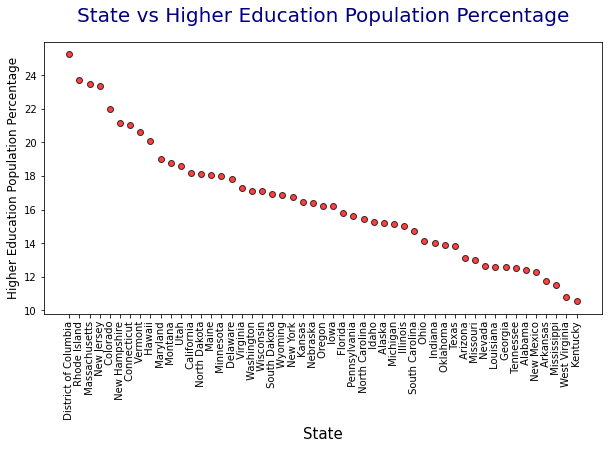

In [43]:
#State vs higher ed scatterplot
x = state_ed["State"]
y = state_ed["Percent educational attainment Pop 25yrs> Bachelor's Degree"]
plt.figure(figsize=(10,5))
plt.scatter(x, y, marker = 'o', facecolors ='red', edgecolors='black', alpha = 0.75)
x_axis = np.arange(len(x))
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, state_ed["State"], rotation="vertical")
plt.xlabel('State', fontsize=15)
plt.ylabel('Higher Education Population Percentage', fontsize=12)
plt.title('State vs Higher Education Population Percentage', fontsize=20,pad=20,color="navy")
plt.show()


#print(f"The mean of Higher Education Population Percentage is: {round(state_ed.PercenteducationalattainmentPop25yrs>Bachelor'sDegree.mean(),2)}")
#print(f"The standard deviation of Higher Education Population Percentage is: {round(state_ed.Percent educational attainment Pop 25yrs> Bachelor's Degree.std(),2)}")



#print(f"The mean MPG of all vehicles is: {round(fuel_economy.Combined_MPG.mean(),2)}")
#print(f"The standard deviation of all vehicle's MPG is: {round(fuel_economy.Combined_MPG.std(),2)}")

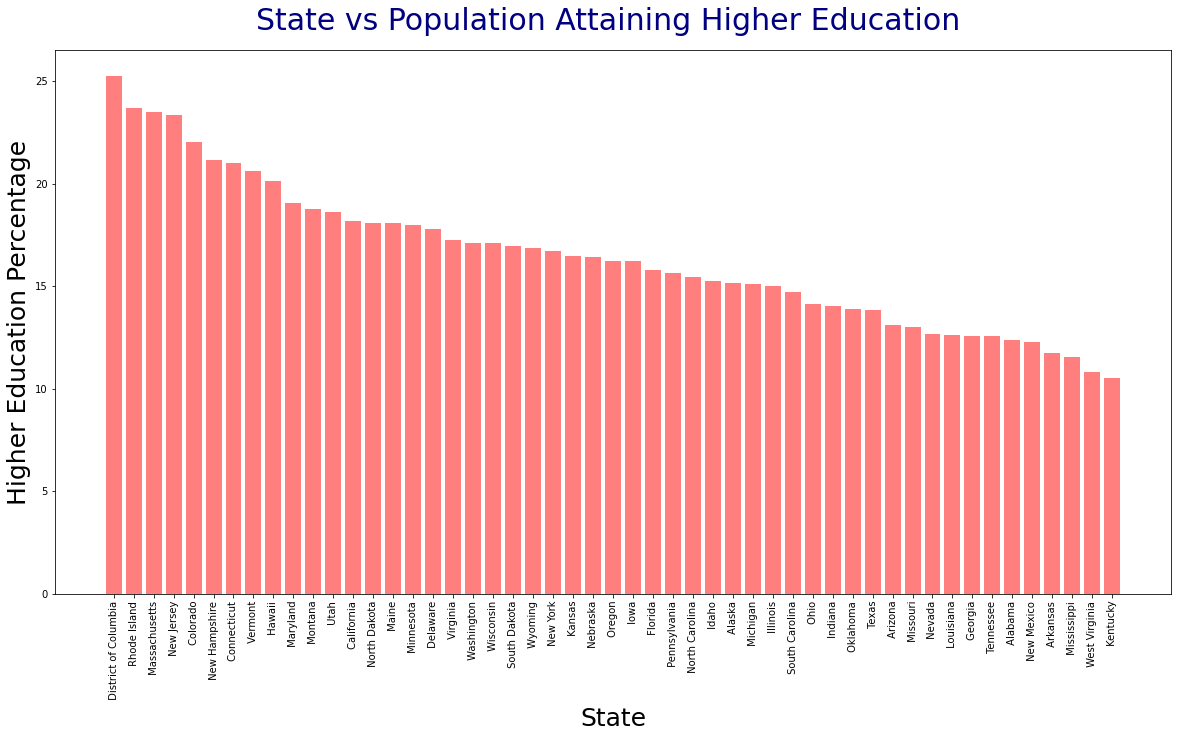

<Figure size 432x288 with 0 Axes>

In [48]:
#State vs Percent Population attaining higher education
x = state_ed["State"]
x_axis = np.arange(len(x))
y_axis = state_ed["Percent educational attainment Pop 25yrs> Bachelor's Degree"]
plt.figure(figsize=(20,10))
plt.bar(x_axis, y, color='r', alpha=0.5, align="center") 
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, x, rotation="vertical")
plt.xlabel('State', fontsize=25)
plt.ylabel('Higher Education Percentage', fontsize=25)
plt.title('State vs Population Attaining Higher Education ', fontsize=30,pad=20,color="navy")

#print(f"The mean of Higher Education Population Percentage is: {round(state_ed.PercenteducationalattainmentPop25yrs>Bachelor'sDegree.mean(),2)}")
#print(f"The standard deviation of Higher Education Population Percentage is: {round(state_ed.Percent educational attainment Pop 25yrs> Bachelor's Degree.std(),2)}")

plt.show()
plt.savefig("Barchart_State_ed")



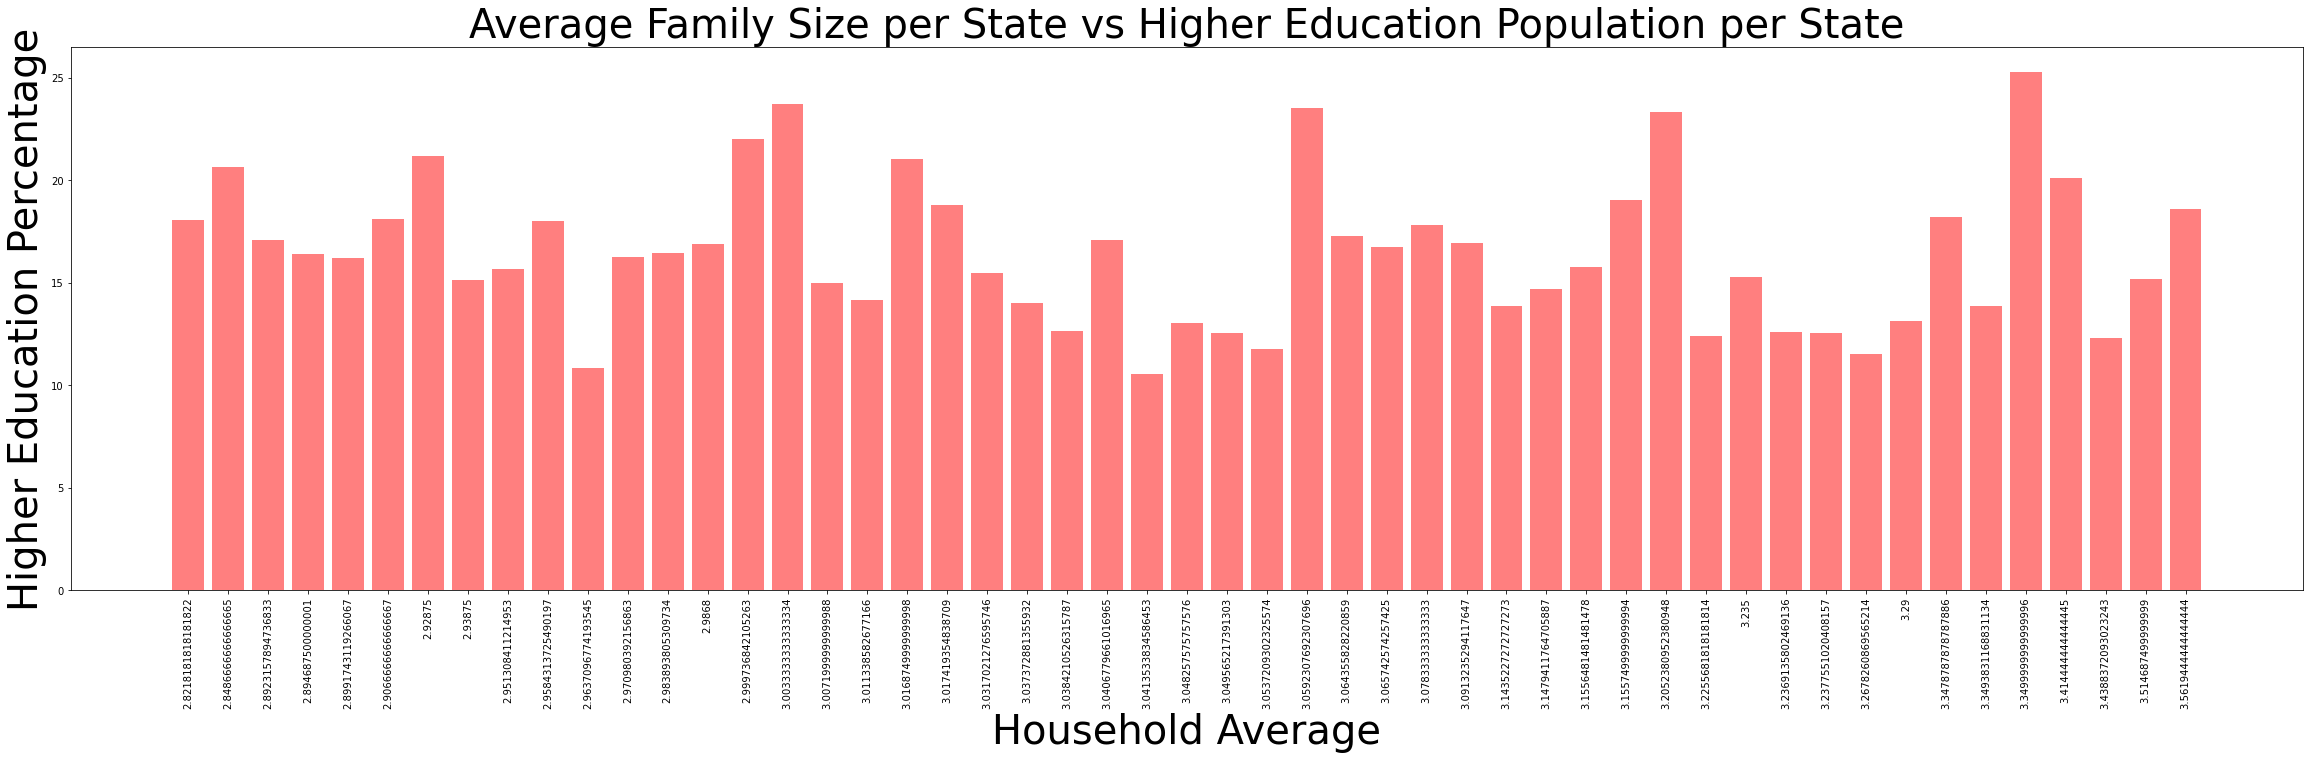

In [9]:
#Household avg. vs Percent Population attaining higher education by state bar chart
x = state_ed["Estimate!!HOUSEHOLDS BY TYPE!!Total households!!Average family size"]
x_axis = np.arange(len(x))
y = state_ed["Percent educational attainment Pop 25yrs> Bachelor's Degree"]
plt.figure(figsize=(40,10))
plt.bar(x_axis, y, color='r', alpha=0.5, align="center") 
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, x, rotation="vertical")
plt.xlabel('Household Average', fontsize=40)
plt.ylabel('Higher Education Percentage', fontsize=40)
plt.title('Average Family Size per State vs Higher Education Population per State', fontsize=40)
plt.show()

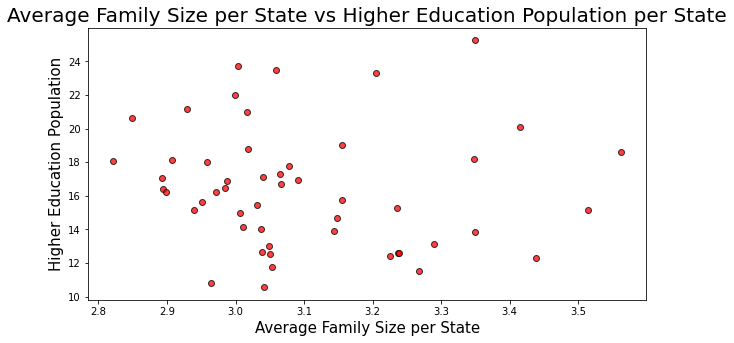

In [10]:
#Household avg. vs Percent Population attaining higher education by state scatterplot
x = state_ed["Estimate!!HOUSEHOLDS BY TYPE!!Total households!!Average family size"]
y = state_ed["Percent educational attainment Pop 25yrs> Bachelor's Degree"]
plt.figure(figsize=(10,5))
plt.scatter(x, y, marker = 'o', facecolors ='red', edgecolors='black', alpha = 0.75)
x_axis = np.arange(len(x))
tick_locations = [value for value in x_axis]
#plt.xticks(tick_locations, state_ed["State"], rotation="vertical")
plt.xlabel('Average Family Size per State', fontsize=15)
plt.ylabel('Higher Education Population', fontsize=15)
plt.title('Average Family Size per State vs Higher Education Population per State', fontsize=20)
plt.show()

In [13]:
# Calculate the correlation coefficient between Average Family Size and Higher Education Population per State
print(f"The correlation coefficient between Average Family Size and Higher Education Population per State is {round(st.pearsonr(x,y)[0],2)}")

The correlation coefficient between Average Family Size and Higher Education Population per State is -0.09


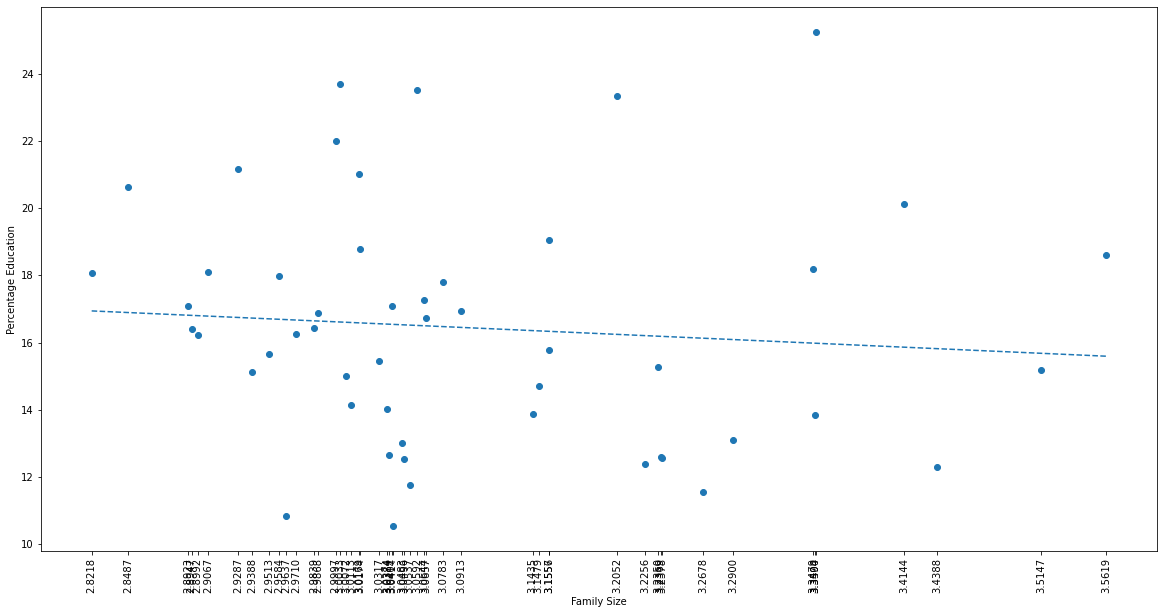

In [16]:
#plotting scatter and linear model for Family Size  versus Higher Education Population
percentage_education =state_ed["Percent educational attainment Pop 25yrs> Bachelor's Degree"]
family_size = state_ed["Estimate!!HOUSEHOLDS BY TYPE!!Total households!!Average family size"]
p_slope, p_int, p_r, p_p, p_std_err = stats.linregress(family_size , percentage_education)
p_fit = p_slope * family_size+ p_int
plt.figure(figsize=(20,10))
plt.scatter(family_size,percentage_education)
plt.plot(family_size,p_fit,"--")
plt.xticks(family_size, rotation=90)
plt.xlabel('Family Size')
plt.ylabel('Percentage Education')
plt.show()

In [35]:
#Outliers of Percentage of Education in different States


educationPercentages=state_ed["Percent educational attainment Pop 25yrs> Bachelor's Degree"]
educationPercentages

quartiles = educationPercentages.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Percentage of Education is: {lowerq}")
print(f"The upper quartile of Percentage of Education is: {upperq}")
print(f"The interquartile range of Percentage of Education is: {iqr}")
print(f"The the median of Percentage of Education is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Percentage of Education is: 13.869074675324672
The upper quartile of Percentage of Education is: 18.140404040404036
The interquartile range of Percentage of Education is: 4.271329365079364
The the median of Percentage of Education is: 16.243137254901956 
Values below 7.462080627705626 could be outliers.
Values above 24.54739808802308 could be outliers.


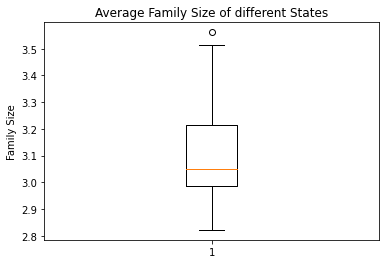

In [19]:
# Box Plot of Percentage of Education in different States
family_size =state_ed["Estimate!!HOUSEHOLDS BY TYPE!!Total households!!Average family size"]
fig1, ax1 = plt.subplots()
ax1.set_title( 'Average Family Size of different States')
ax1.set_ylabel('Family Size')
ax1.boxplot(family_size)
plt.show()

In [20]:
#Outliers of Percentage of Education in different States

educationPercentages=state_ed["Percent educational attainment Pop 25yrs> Bachelor's Degree"]
educationPercentages
quartiles = educationPercentages.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print(f"The lower quartile of Family Size is: {lowerq}")
print(f"The upper quartile of Family Size is: {upperq}")
print(f"The interquartile range of Family Size is: {iqr}")
print(f"The the median of Family Size is: {quartiles[0.5]} ")
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Family Size is: 13.869074675324672
The upper quartile of Family Size is: 18.140404040404036
The interquartile range of Family Size is: 4.271329365079364
The the median of Family Size is: 16.243137254901956 
Values below 7.462080627705626 could be outliers.
Values above 24.54739808802308 could be outliers.


The r-squared is: 0.007838425943473596


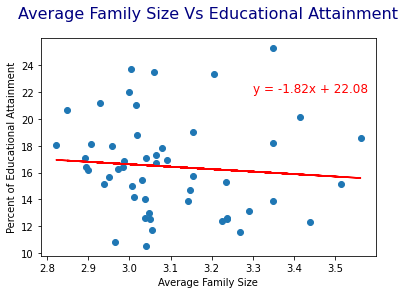

<Figure size 432x288 with 0 Axes>

In [49]:
# To find the r-squared

x = state_ed["Estimate!!HOUSEHOLDS BY TYPE!!Total households!!Average family size"]
y = state_ed["Percent educational attainment Pop 25yrs> Bachelor's Degree"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(3.3,22),fontsize=12,color="red")

plt.xlabel("Average Family Size")
plt.ylabel("Percent of Educational Attainment")
print(f"The r-squared is: {rvalue**2}")
plt.title("Average Family Size Vs Educational Attainment",fontsize=16,color="navy",pad=20)
plt.show()
plt.savefig("Scatter_Family_ed")


In [29]:
df= state_ed
df.head()

,index,State,Percent educational attainment Pop 25yrs> Bachelor's Degree,Estimate!!HOUSEHOLDS BY TYPE!!Total households!!Average family size
0,19,Maine,18.068182,2.821818
1,45,Vermont,20.620000,2.848667
2,49,Wisconsin,17.081053,2.892316
3,27,Nebraska,16.407292,2.894688
4,15,Iowa,16.222018,2.899174


In [30]:
# The degree of freedom is 3-1 =2
# With a p-value of 0.05, the confidence level is 1.00-0.05 = 0.95.
critical_value = stats.chi2.ppf(q = 0.95, df = 2)

In [31]:
critical_value

5.991464547107979

In [33]:
# To find  the chi square test with stats.chisquare()
df=state_ed
stats.chisquare(df["Percent educational attainment Pop 25yrs> Bachelor's Degree"], df["Estimate!!HOUSEHOLDS BY TYPE!!Total households!!Average family size"])

Power_divergenceResult(statistic=3155.240581965662, pvalue=0.0)

In [34]:
print("The chi square value 3155.24 exceeds the critical value of 5.99, we can say that the results are statistically significant")

The chi square value 3155.24 exceeds the critical value of 5.99, we can say that the results are statistically significant


In [ ]:
print(" Since the p-value =0, we accept the null hypothesis and reject the alternative hypothesis")
print("Ho: Household size  does not have any impact on the ability to obtain higher education")
print("HA: Larger household size impacts ability to obtain higher education")         

In [ ]:
print("Conclusion:Average Household Family Size does not impact on the ability to obtain higher education")